In [1]:
import numpy as np
from TDD.TDD2 import Ini_TDD,Clear_TDD,set_index_order,get_tdd,to_cnf2
from TDD.TDD_Q2 import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD.TDD_Q2 import reshape as reshape2
from TDD.TN2 import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
from sympy import *
from sympy.parsing.sympy_parser import parse_expr

/home/Wei-Jia/anaconda3/envs/qiskit/lib/python3.9/site-packages/sympy/core/sympify.py:456: SymPyDeprecationWarning: 

String fallback in sympify has been deprecated since SymPy 1.6. Use
sympify(str(obj)) or sympy.core.sympify.converter or obj._sympy_
instead. See https://github.com/sympy/sympy/issues/18066 for more
info.

  SymPyDeprecationWarning(


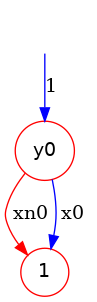

In [2]:
Ini_TDD(['x0','y0','x1','y1'])
A=['x0','y0','x1','y1','xn0']
[x0,y0,x1,y1,xn0]=symbols(A)
U=np.array([xn0,x0])
var=[Index('y0')]
ts1=Tensor(U,var)
ts1.tdd().show()

# ts2=Tensor(U,var)

/home/Wei-Jia/anaconda3/envs/qiskit/lib/python3.9/site-packages/sympy/core/sympify.py:456: SymPyDeprecationWarning: 

String fallback in sympify has been deprecated since SymPy 1.6. Use
sympify(str(obj)) or sympy.core.sympify.converter or obj._sympy_
instead. See https://github.com/sympy/sympy/issues/18066 for more
info.

  SymPyDeprecationWarning(


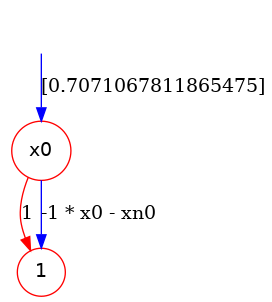

In [3]:
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
var2=[Index('x0'),Index('y0')]
ts2=Tensor(H,var2)
# ts2.tdd().show()
tn=TensorNetwork([ts1,ts2])
tdd=tn.cont()
tdd.weight=[1/np.sqrt(2)]
tdd.show()
# Clear_TDD()

/home/Wei-Jia/anaconda3/envs/qiskit/lib/python3.9/site-packages/sympy/core/sympify.py:456: SymPyDeprecationWarning: 

String fallback in sympify has been deprecated since SymPy 1.6. Use
sympify(str(obj)) or sympy.core.sympify.converter or obj._sympy_
instead. See https://github.com/sympy/sympy/issues/18066 for more
info.

  SymPyDeprecationWarning(


4


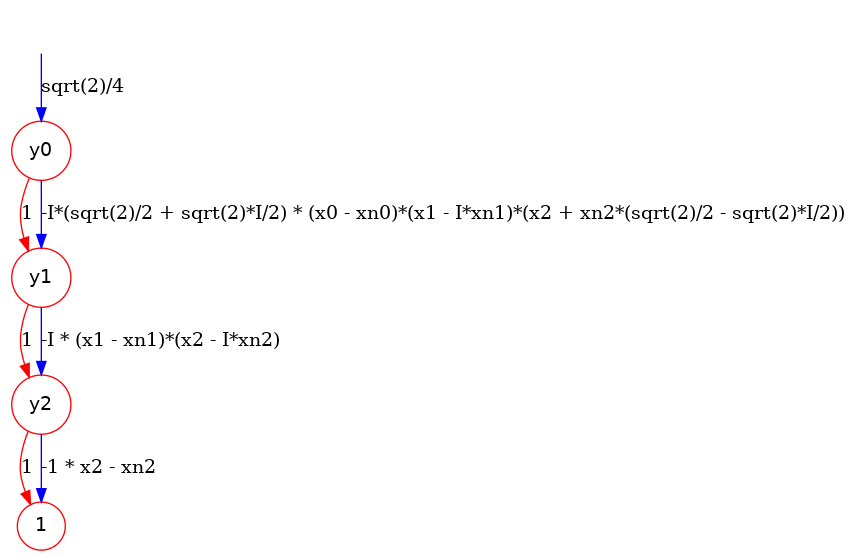

In [4]:
path='Benchmarks/'
n=3
file_name='qft_'+str(n)+'.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,indices=cir_2_tn(cir)
for k in range(n):
    x_k='x'+str(k)
    xn_k='xn'+str(k)
    s=Symbol(x_k)
    ns=Symbol(xn_k)
    U=np.array([ns,s])
#     U=np.array([1,0])
    temp_ts=Tensor(U,[Index(x_k)])
    tn.tensors.insert(0,temp_ts)
Ini_TDD(indices)
tdd=tn.cont()
print(tdd.node_number())
tdd.show()

[[[[1 0]
   [0 1]]

  [[0 0]
   [0 0]]]


 [[[0 0]
   [0 0]]

  [[xn0 x0]
   [x0 xn0]]]]
10


/home/Wei-Jia/anaconda3/envs/qiskit/lib/python3.9/site-packages/sympy/core/sympify.py:456: SymPyDeprecationWarning: 

String fallback in sympify has been deprecated since SymPy 1.6. Use
sympify(str(obj)) or sympy.core.sympify.converter or obj._sympy_
instead. See https://github.com/sympy/sympy/issues/18066 for more
info.

  SymPyDeprecationWarning(


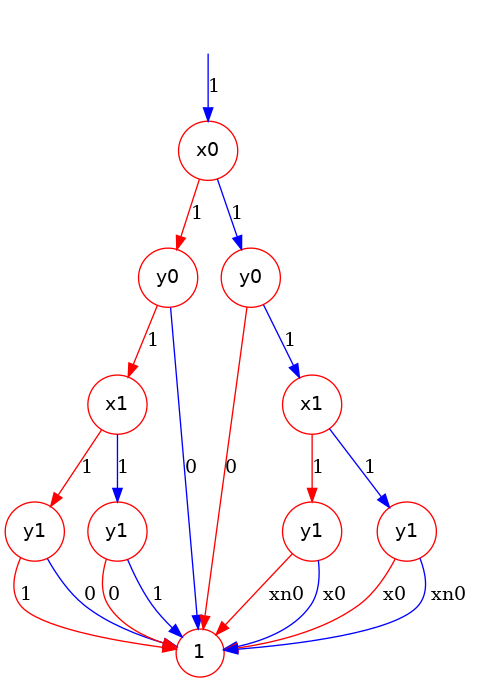

In [5]:
Ini_TDD(['x0','y0','x1','y1'])
x=symbols('x0')
nx=symbols('xn0')
U=np.array([[1,0,0,0],[0,1,0,0],[0,0,nx,x],[0,0,x,nx]])
# U=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
U=reshape2(U)
print(U)
var=[Index('x0'),Index('y0'),Index('x1'),Index('y1')]
ts1=Tensor(U,var)
tdd=ts1.tdd()
print(tdd.node_number())
tdd.show()
# ts2=Tensor(U,var)

/home/Wei-Jia/anaconda3/envs/qiskit/lib/python3.9/site-packages/sympy/core/sympify.py:456: SymPyDeprecationWarning: 

String fallback in sympify has been deprecated since SymPy 1.6. Use
sympify(str(obj)) or sympy.core.sympify.converter or obj._sympy_
instead. See https://github.com/sympy/sympy/issues/18066 for more
info.

  SymPyDeprecationWarning(


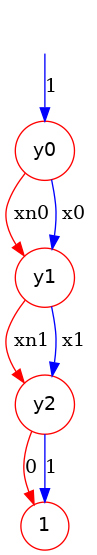

In [6]:
Ini_TDD(['x0','x0_1','x0_2','y0','x1','x1_1','x1_2','y1','x2','x2_1','x2_2','x2_3','y2'])
s0=symbols('x0')
sn0=symbols('xn0')
s1=symbols('x1')
sn1=symbols('xn1')
tn=TensorNetwork([])
U=np.array([1,0])
var=[Index('x0')]
ts=Tensor(U,var)
tn.tensors.append(ts)
var=[Index('x1')]
ts=Tensor(U,var)
tn.tensors.append(ts)
U=np.array([0,1])
var=[Index('x2')]
ts=Tensor(U,var)
tn.tensors.append(ts)

H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
var=[Index('x0'),Index('x0_1')]
ts=Tensor(H,var)
tn.tensors.append(ts)
var=[Index('x1'),Index('x1_1')]
ts=Tensor(H,var)
tn.tensors.append(ts)
var=[Index('x2'),Index('x2_1')]
ts=Tensor(H,var)
tn.tensors.append(ts)

U=np.array([[1,0,0,0],[0,1,0,0],[0,0,sn0,s0],[0,0,s0,sn0]])
U=reshape2(U)
var=[Index('x0_1'),Index('x0_2'),Index('x2_1'),Index('x2_2')]
ts=Tensor(U,var)
tn.tensors.append(ts)

U=np.array([[1,0,0,0],[0,1,0,0],[0,0,sn1,s1],[0,0,s1,sn1]])
U=reshape2(U)
var=[Index('x1_1'),Index('x1_2'),Index('x2_2'),Index('x2_3')]
ts=Tensor(U,var)
tn.tensors.append(ts)

var=[Index('x0_2'),Index('y0')]
ts=Tensor(H,var)
tn.tensors.append(ts)
var=[Index('x1_2'),Index('y1')]
ts=Tensor(H,var)
tn.tensors.append(ts)
var=[Index('x2_3'),Index('y2')]
ts=Tensor(H,var)
tn.tensors.append(ts)

# tdd=ts1.tdd()
# print(tdd.node_number())
tdd=tn.cont()
tdd.show()

/home/Wei-Jia/anaconda3/envs/qiskit/lib/python3.9/site-packages/sympy/core/sympify.py:456: SymPyDeprecationWarning: 

String fallback in sympify has been deprecated since SymPy 1.6. Use
sympify(str(obj)) or sympy.core.sympify.converter or obj._sympy_
instead. See https://github.com/sympy/sympy/issues/18066 for more
info.

  SymPyDeprecationWarning(


10


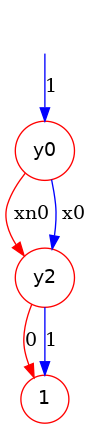

In [7]:
Ini_TDD(['x0','x0_1','x0_2','y0','x1','x1_1','x1_2','y1','x2','x2_1','x2_2','x2_3','y2'])
s0=symbols('x0')
sn0=symbols('xn0')
s1=symbols('x1')
sn1=symbols('xn1')
tn=TensorNetwork([])
U=np.array([1,0])
var=[Index('x0')]
ts=Tensor(U,var)
tn.tensors.append(ts)
U=np.array([0,1])
var=[Index('x2')]
ts=Tensor(U,var)
tn.tensors.append(ts)

H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
var=[Index('x0'),Index('x0_1')]
ts=Tensor(H,var)
tn.tensors.append(ts)
var=[Index('x2'),Index('x2_1')]
ts=Tensor(H,var)
tn.tensors.append(ts)

U=np.array([[1,0,0,0],[0,1,0,0],[0,0,sn0,s0],[0,0,s0,sn0]])
U=reshape2(U)
var=[Index('x0_1'),Index('x0_2'),Index('x2_1'),Index('x2_2')]
ts=Tensor(U,var)
tn.tensors.append(ts)

var=[Index('x0_2'),Index('y0')]
ts=Tensor(H,var)
tn.tensors.append(ts)
var=[Index('x2_2'),Index('y2')]
ts=Tensor(H,var)
tn.tensors.append(ts)

tdd=ts1.tdd()
print(tdd.node_number())
tdd=tn.cont()
tdd.show()